Convex Hull using Extreme Point Removal

In [16]:
from classes.Point import Point
from classes.Polygon import Polygon
import matplotlib.pyplot as plt

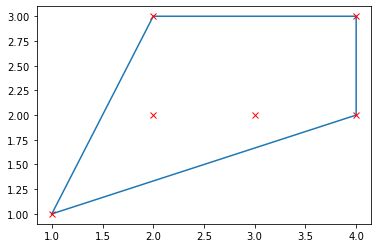

In [41]:
set_of_points = [Point(1,1), Point(2,2), Point(2,3), Point(3,2), Point(4,2), Point(4,3)]
total_points = len(set_of_points)

non_extreme_points = []
for i in range(total_points):
    for j in range(total_points):
        if(i == j):
            continue
        for k in range(total_points):
            if i != j and i != k and  j != k:
                for l in range(total_points):
                    if i != j and i != l and i != k and j != k and j != l and k != l:
                        triangle = Polygon([set_of_points[i], set_of_points[j], set_of_points[k]])
                        query_point = set_of_points[l]
                        inside = triangle.check_point_inclusion(query_point)
                        if inside:
                            non_extreme_points.append(l)

convex_hull = []

for i in range(total_points):
    if i not in non_extreme_points:
        convex_hull.append(set_of_points[i])

convex_hull_polygon = Polygon(convex_hull)
convex_hull_polygon.draw()

for point in set_of_points:
    plt.plot(point.x, point.y, "rx")
plt.show()

In [42]:
# Extreme Edge Elimination Method

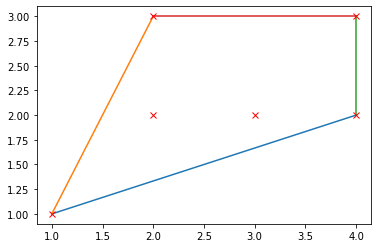

In [62]:
from classes.helpers import collinear, left_turn
from classes.Line import Line

set_of_points = [Point(1,1), Point(2,2), Point(2,3), Point(3,2), Point(4,2), Point(4,3)]
total_points = len(set_of_points)

extreme_edges = []
for i in range(total_points):
    for j in range(total_points):
        if(i != j):
            extreme = True
            for k in range(total_points):
                if i != j and i != k and  j != k:
                    left = left_turn(set_of_points[i], set_of_points[j], set_of_points[k])
                    on = collinear(set_of_points[i], set_of_points[j], set_of_points[k])
                    if not left or on:
                        extreme = False
            if extreme:
                extreme_edges.append(Line(set_of_points[i], set_of_points[j]))


for edge in extreme_edges:
    plt.plot([edge.point_a.x, edge.point_b.x], [edge.point_a.y, edge.point_b.y])
for point in set_of_points:
    plt.plot(point.x, point.y, 'rx')
plt.show()


In [63]:
# Grahm Scan Algorithm

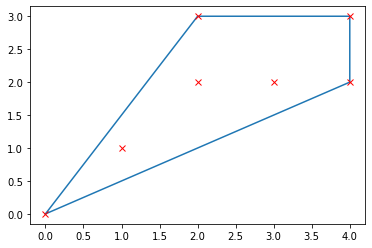

In [74]:
set_of_points = [Point(1,1), Point(2,2), Point(2,3), Point(3,2), Point(4,2), Point(4,3), Point(0,0)]
total_points = len(set_of_points)

# Find lowest y coordinate
lowest_y_coord_point = set_of_points[0]
for point in set_of_points:
    if point.y < lowest_y_coord_point.y:
        lowest_y_coord_point = point

# Angular sort points using lowest y coordinate as reference
def sort_by_angle(point):
    return lowest_y_coord_point.angle(point)

set_of_points.sort(key=sort_by_angle)

# Push q0 into stack S and push q1 into the stack S.
stack = []
stack.append(set_of_points[0])
stack.append(set_of_points[1])

# Initialize i = 2
i = 2

while i < total_points:
    left = left_turn(stack[len(stack) - 2], stack[len(stack) - 1], set_of_points[i])
    if left:
        stack.append(set_of_points[i])
        i += 1
    else:
        stack.pop()

stack.append(stack[0])
plt.plot([point.x for point in stack], [point.y for point in stack])

for point in set_of_points:
    plt.plot(point.x, point.y, 'rx')
plt.show()